<a href="https://colab.research.google.com/github/MwangiMuriuki2003/MURIUKI/blob/main/Dummy_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required packages (run in terminal or notebook cell with !)
# !pip install pandas numpy matplotlib seaborn scipy scikit-learn plotly jupyter

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

def generate_health_data(n_samples=1000):
    """
    Generate synthetic health data with realistic correlations
    """
    # Base variables
    age = np.random.normal(45, 15, n_samples)
    age = np.clip(age, 18, 80)

    gender = np.random.choice(['M', 'F'], n_samples)

    # Salt intake (mg/day) - influenced by age and gender
    salt_base = np.random.normal(2300, 800, n_samples)  # Average daily sodium
    salt_intake = salt_base + (age - 45) * 10 + np.where(gender == 'M', 200, -100)
    salt_intake = np.clip(salt_intake, 1000, 5000)

    # Cholesterol (mg/dL) - influenced by age, gender, and salt
    chol_base = np.random.normal(200, 40, n_samples)
    cholesterol = (chol_base +
                  (age - 45) * 1.5 +
                  np.where(gender == 'M', 15, -10) +
                  (salt_intake - 2300) * 0.01 +
                  np.random.normal(0, 15, n_samples))
    cholesterol = np.clip(cholesterol, 120, 350)

    # Blood pressure (systolic) - influenced by age, salt, cholesterol
    bp_base = np.random.normal(125, 20, n_samples)
    blood_pressure = (bp_base +
                     (age - 45) * 0.8 +
                     (salt_intake - 2300) * 0.003 +
                     (cholesterol - 200) * 0.15 +
                     np.random.normal(0, 10, n_samples))
    blood_pressure = np.clip(blood_pressure, 90, 200)

    # Create DataFrame
    data = pd.DataFrame({
        'age': age.round(0).astype(int),
        'gender': gender,
        'salt_intake_mg': salt_intake.round(0).astype(int),
        'cholesterol_mg_dl': cholesterol.round(1),
        'systolic_bp_mmhg': blood_pressure.round(0).astype(int)
    })

    return data

# Generate the dataset
df = generate_health_data(1000)
print("Dataset generated successfully!")
print(f"Shape: {df.shape}")
print(df.head())

Dataset generated successfully!
Shape: (1000, 5)
   age gender  salt_intake_mg  cholesterol_mg_dl  systolic_bp_mmhg
0   52      M            2282              252.2               141
1   43      F            2327              120.0                92
2   55      M            1519              192.5               114
3   68      F            1651              200.0               129
4   41      M            3425              263.3               138


=== DATASET OVERVIEW ===
Dataset shape: (1000, 5)

Data types:
age                    int64
gender                object
salt_intake_mg         int64
cholesterol_mg_dl    float64
systolic_bp_mmhg       int64
dtype: object

Missing values:
age                  0
gender               0
salt_intake_mg       0
cholesterol_mg_dl    0
systolic_bp_mmhg     0
dtype: int64

Basic statistics:
               age  salt_intake_mg  cholesterol_mg_dl  systolic_bp_mmhg
count  1000.000000     1000.000000        1000.000000       1000.000000
mean     45.361000     2391.885000         204.089200        127.112000
std      14.196909      774.097418          48.078376         25.304303
min      18.000000     1000.000000         120.000000         90.000000
25%      35.000000     1826.500000         170.575000        107.000000
50%      45.000000     2398.500000         203.050000        127.000000
75%      55.000000     2930.250000         236.950000        145.000000
max      80.000000     5000.000000    

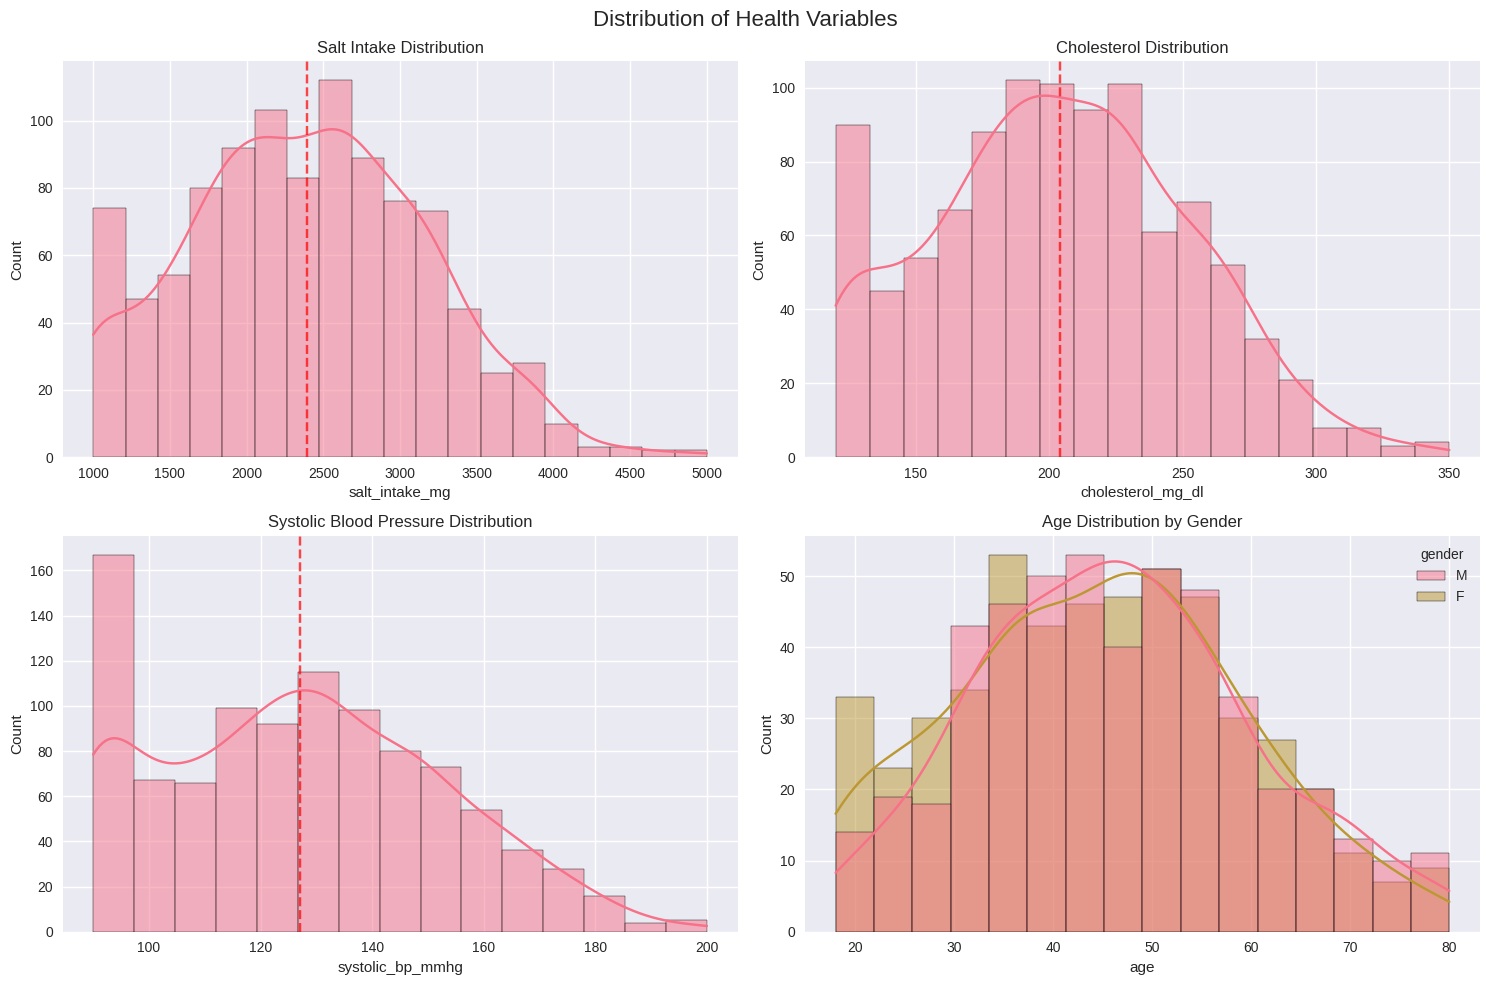

In [4]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df.describe()}")

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Health Variables', fontsize=16)

# Salt intake distribution
sns.histplot(data=df, x='salt_intake_mg', kde=True, ax=axes[0,0])
axes[0,0].set_title('Salt Intake Distribution')
axes[0,0].axvline(df['salt_intake_mg'].mean(), color='red', linestyle='--', alpha=0.7)

# Cholesterol distribution
sns.histplot(data=df, x='cholesterol_mg_dl', kde=True, ax=axes[0,1])
axes[0,1].set_title('Cholesterol Distribution')
axes[0,1].axvline(df['cholesterol_mg_dl'].mean(), color='red', linestyle='--', alpha=0.7)

# Blood pressure distribution
sns.histplot(data=df, x='systolic_bp_mmhg', kde=True, ax=axes[1,0])
axes[1,0].set_title('Systolic Blood Pressure Distribution')
axes[1,0].axvline(df['systolic_bp_mmhg'].mean(), color='red', linestyle='--', alpha=0.7)

# Age distribution by gender
sns.histplot(data=df, x='age', hue='gender', kde=True, ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Gender')

plt.tight_layout()
plt.show()

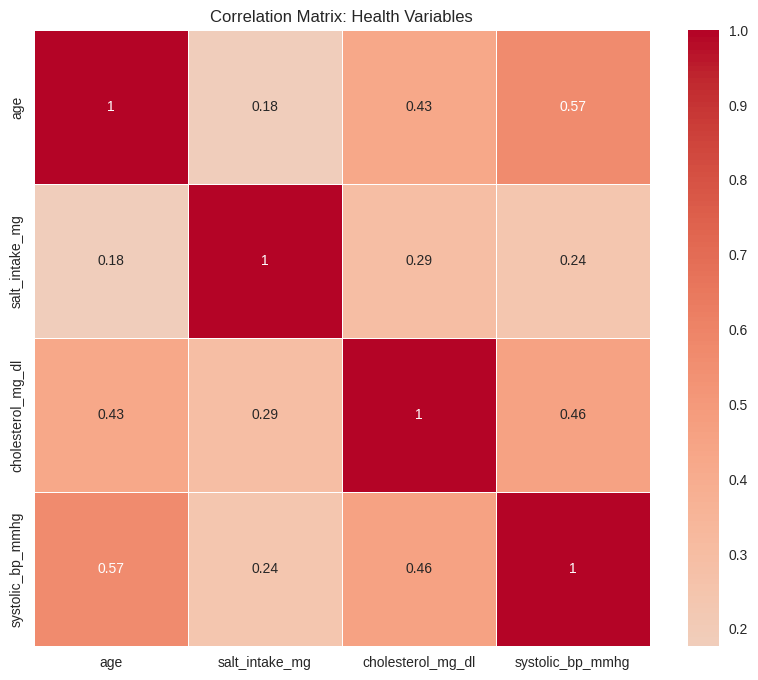

=== CORRELATION ANALYSIS ===
Salt Intake vs Blood Pressure: 0.23626331385116328
Cholesterol vs Blood Pressure: 0.46202195536985924
Salt Intake vs Cholesterol: 0.2898897731281668


In [5]:
# Calculate correlations
numeric_cols = ['age', 'salt_intake_mg', 'cholesterol_mg_dl', 'systolic_bp_mmhg']
correlation_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Health Variables')
plt.show()

# Detailed correlation analysis
print("=== CORRELATION ANALYSIS ===")
print("Salt Intake vs Blood Pressure:", df['salt_intake_mg'].corr(df['systolic_bp_mmhg']))
print("Cholesterol vs Blood Pressure:", df['cholesterol_mg_dl'].corr(df['systolic_bp_mmhg']))
print("Salt Intake vs Cholesterol:", df['salt_intake_mg'].corr(df['cholesterol_mg_dl']))

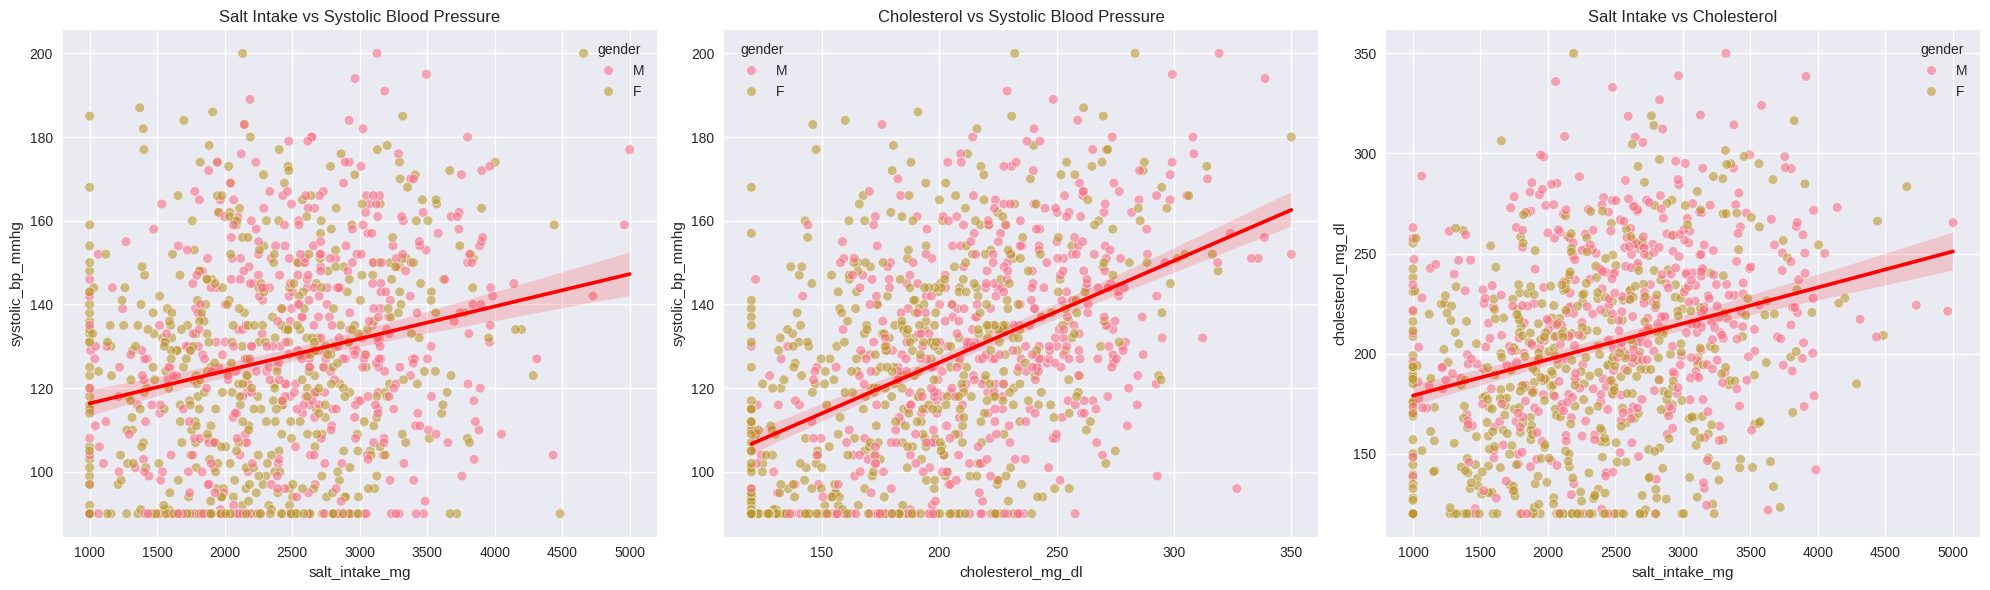

In [6]:
# Scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Salt vs Blood Pressure
sns.scatterplot(data=df, x='salt_intake_mg', y='systolic_bp_mmhg',
                hue='gender', alpha=0.6, ax=axes[0])
sns.regplot(data=df, x='salt_intake_mg', y='systolic_bp_mmhg',
            scatter=False, ax=axes[0], color='red')
axes[0].set_title('Salt Intake vs Systolic Blood Pressure')

# Cholesterol vs Blood Pressure
sns.scatterplot(data=df, x='cholesterol_mg_dl', y='systolic_bp_mmhg',
                hue='gender', alpha=0.6, ax=axes[1])
sns.regplot(data=df, x='cholesterol_mg_dl', y='systolic_bp_mmhg',
            scatter=False, ax=axes[1], color='red')
axes[1].set_title('Cholesterol vs Systolic Blood Pressure')

# Salt vs Cholesterol
sns.scatterplot(data=df, x='salt_intake_mg', y='cholesterol_mg_dl',
                hue='gender', alpha=0.6, ax=axes[2])
sns.regplot(data=df, x='salt_intake_mg', y='cholesterol_mg_dl',
            scatter=False, ax=axes[2], color='red')
axes[2].set_title('Salt Intake vs Cholesterol')

plt.tight_layout()
plt.show()

# 3D Scatter Plot
fig = px.scatter_3d(df, x='salt_intake_mg', y='cholesterol_mg_dl', z='systolic_bp_mmhg',
                    color='gender', size='age', opacity=0.7,
                    title='3D Relationship: Salt, Cholesterol, Blood Pressure')
fig.show()


In [7]:
# Statistical significance tests
from scipy.stats import pearsonr, spearmanr

print("=== STATISTICAL SIGNIFICANCE TESTS ===")

# Pearson correlation tests
def test_correlation(x, y, labels):
    corr, p_value = pearsonr(x, y)
    print(f"{labels}: r={corr:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("  → Statistically significant correlation")
    else:
        print("  → No statistically significant correlation")
    print()

test_correlation(df['salt_intake_mg'], df['systolic_bp_mmhg'],
                'Salt Intake vs Blood Pressure')
test_correlation(df['cholesterol_mg_dl'], df['systolic_bp_mmhg'],
                'Cholesterol vs Blood Pressure')
test_correlation(df['salt_intake_mg'], df['cholesterol_mg_dl'],
                'Salt Intake vs Cholesterol')

# Group comparisons (gender)
male_data = df[df['gender'] == 'M']
female_data = df[df['gender'] == 'F']

from scipy.stats import ttest_ind

# T-test for gender differences
for col in numeric_cols:
    if col != 'age':  # Assuming age doesn't differ significantly by design
        stat, p_val = ttest_ind(male_data[col], female_data[col])
        print(f"Gender difference in {col}: t={stat:.3f}, p={p_val:.3f}")

=== STATISTICAL SIGNIFICANCE TESTS ===
Salt Intake vs Blood Pressure: r=0.236, p-value=0.000
  → Statistically significant correlation

Cholesterol vs Blood Pressure: r=0.462, p-value=0.000
  → Statistically significant correlation

Salt Intake vs Cholesterol: r=0.290, p-value=0.000
  → Statistically significant correlation

Gender difference in salt_intake_mg: t=5.699, p=0.000
Gender difference in cholesterol_mg_dl: t=9.055, p=0.000
Gender difference in systolic_bp_mmhg: t=3.218, p=0.001


=== Linear Regression ===
MSE: 398.93
R²: 0.418

=== Random Forest ===
MSE: 501.10
R²: 0.269



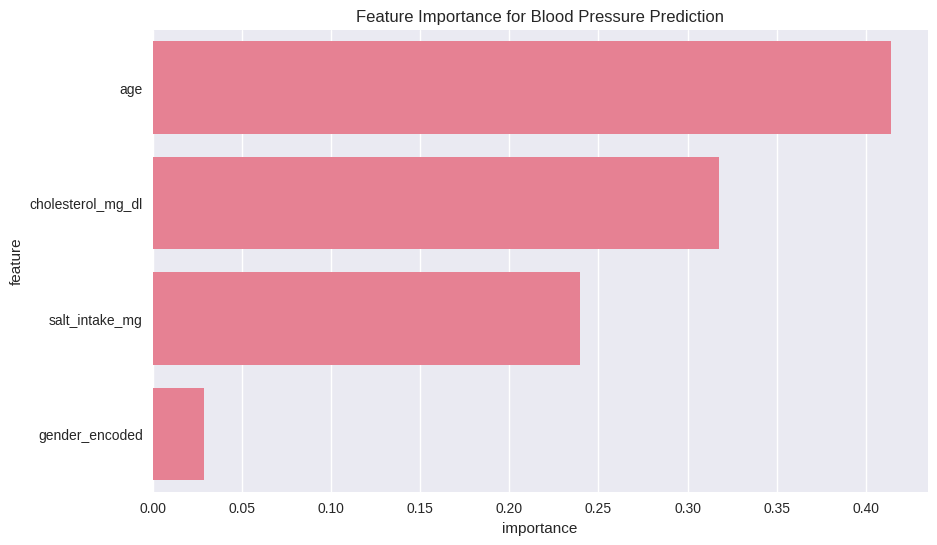

In [8]:
# Prepare data for modeling
# Encode categorical variables
df_model = df.copy()
df_model['gender_encoded'] = df_model['gender'].map({'M': 1, 'F': 0})

# Features and target
features = ['age', 'gender_encoded', 'salt_intake_mg', 'cholesterol_mg_dl']
X = df_model[features]
y = df_model['systolic_bp_mmhg']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}

    print(f"=== {name} ===")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.3f}")
    print()

# Feature importance (Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Blood Pressure Prediction')
plt.show()

=== RISK ANALYSIS ===
Blood Pressure vs Cholesterol Categories:
cholesterol_category  Borderline High  Desirable  High   All
bp_category                                                 
Elevated                           41         67    35   143
High BP Stage 1                    42         62    38   142
High BP Stage 2                   104         85   127   316
Normal                            100        262    37   399
All                               287        476   237  1000


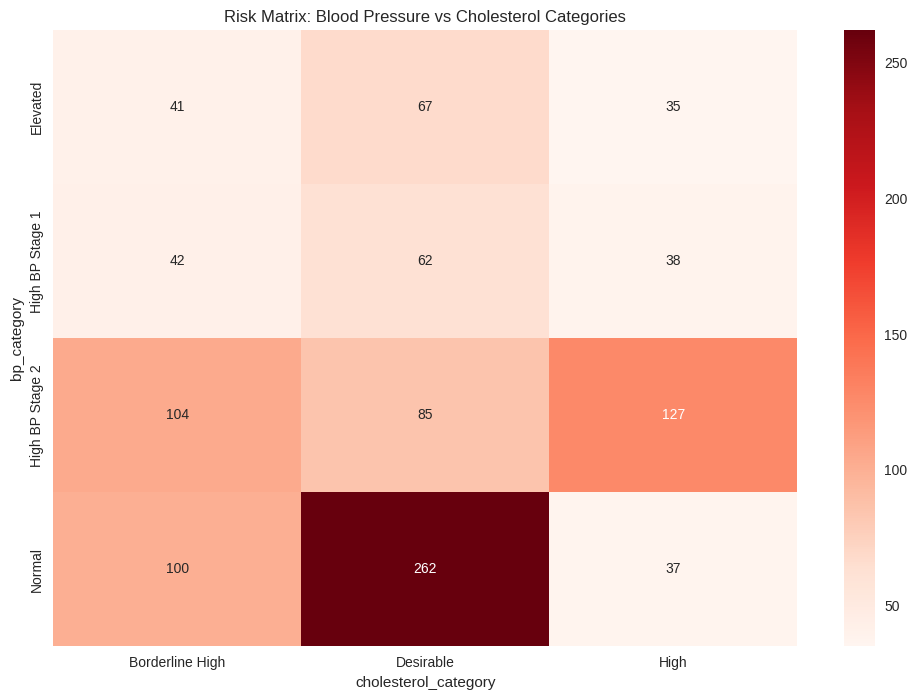

In [9]:
# Define health risk categories
def categorize_bp(bp):
    if bp < 120:
        return 'Normal'
    elif bp < 130:
        return 'Elevated'
    elif bp < 140:
        return 'High BP Stage 1'
    else:
        return 'High BP Stage 2'

def categorize_cholesterol(chol):
    if chol < 200:
        return 'Desirable'
    elif chol < 240:
        return 'Borderline High'
    else:
        return 'High'

# Apply categorizations
df['bp_category'] = df['systolic_bp_mmhg'].apply(categorize_bp)
df['cholesterol_category'] = df['cholesterol_mg_dl'].apply(categorize_cholesterol)

# Risk analysis
risk_analysis = pd.crosstab(df['bp_category'], df['cholesterol_category'], margins=True)
print("=== RISK ANALYSIS ===")
print("Blood Pressure vs Cholesterol Categories:")
print(risk_analysis)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df['bp_category'], df['cholesterol_category']),
            annot=True, fmt='d', cmap='Reds')
plt.title('Risk Matrix: Blood Pressure vs Cholesterol Categories')
plt.show()

In [10]:
# Generate summary report
def generate_health_report(dataframe):
    report = f"""
    HEALTH DATA ANALYSIS REPORT
    ===========================

    Dataset Overview:
    - Total samples: {len(dataframe)}
    - Age range: {dataframe['age'].min()}-{dataframe['age'].max()} years
    - Gender distribution: {dataframe['gender'].value_counts().to_dict()}

    Key Findings:
    - Average salt intake: {dataframe['salt_intake_mg'].mean():.0f} mg/day
    - Average cholesterol: {dataframe['cholesterol_mg_dl'].mean():.1f} mg/dL
    - Average systolic BP: {dataframe['systolic_bp_mmhg'].mean():.0f} mmHg

    Correlations:
    - Salt intake ↔ Blood pressure: {dataframe['salt_intake_mg'].corr(dataframe['systolic_bp_mmhg']):.3f}
    - Cholesterol ↔ Blood pressure: {dataframe['cholesterol_mg_dl'].corr(dataframe['systolic_bp_mmhg']):.3f}
    - Salt intake ↔ Cholesterol: {dataframe['salt_intake_mg'].corr(dataframe['cholesterol_mg_dl']):.3f}

    Risk Categories:
    - High blood pressure: {len(dataframe[dataframe['systolic_bp_mmhg'] >= 140])} patients ({len(dataframe[dataframe['systolic_bp_mmhg'] >= 140])/len(dataframe)*100:.1f}%)
    - High cholesterol: {len(dataframe[dataframe['cholesterol_mg_dl'] >= 240])} patients ({len(dataframe[dataframe['cholesterol_mg_dl'] >= 240])/len(dataframe)*100:.1f}%)
    - Excessive salt intake: {len(dataframe[dataframe['salt_intake_mg'] > 2300])} patients ({len(dataframe[dataframe['salt_intake_mg'] > 2300])/len(dataframe)*100:.1f}%)
    """
    return report

print(generate_health_report(df))

# Save results
df.to_csv('health_analysis_data.csv', index=False)
print("\nData saved to 'health_analysis_data.csv'")
print("Analysis complete!")


    HEALTH DATA ANALYSIS REPORT
    
    Dataset Overview:
    - Total samples: 1000
    - Age range: 18-80 years
    - Gender distribution: {'F': 511, 'M': 489}
    
    Key Findings:
    - Average salt intake: 2392 mg/day
    - Average cholesterol: 204.1 mg/dL
    - Average systolic BP: 127 mmHg
    
    Correlations:
    - Salt intake ↔ Blood pressure: 0.236
    - Cholesterol ↔ Blood pressure: 0.462
    - Salt intake ↔ Cholesterol: 0.290
    
    Risk Categories:
    - High blood pressure: 316 patients (31.6%)
    - High cholesterol: 237 patients (23.7%)
    - Excessive salt intake: 536 patients (53.6%)
    

Data saved to 'health_analysis_data.csv'
Analysis complete!
